## CNN Text Classification with Embedding
### Important - After tokenizing sequences, they are tokenized as 1 ---- len(vocabulary)
## in the keras Embedding layer, the input_dim = len(vocabulary) + 1 (this is if num_words is not provided when initializing Tokenizer)
## If num_words is passed to Tokenizer, use that same value as input_dim to Embedding layer(no need to add 1)

# Ouput Layer Activation: When using SIGMOID instead of softmax , accuracy jumped from 86% to 99%

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split

input layer is going to be an indexed representation of the text. So shape will be
N*length of sequences
After embedding, output shape will be N*length of sequence * length of embedding vector

In [2]:
df=pd.read_csv('spam.csv')
X=df['v2']
y=df['v1'].apply(lambda x:0 if x=='spam' else 1)
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

In [3]:
num_words=None
embedding_length=20
tok=Tokenizer(num_words=num_words)
tok.fit_on_texts(X_train)
X_train=tok.texts_to_sequences(X_train)
X_test=tok.texts_to_sequences(X_test)
X_train=pad_sequences(X_train)
X_test=pad_sequences(X_test,maxlen=X_train.shape[1])

In [4]:
maxsequencelength=X_train.shape[1]
maxsequencelength

189

In [5]:
X_train.shape,y_train.shape

((4179, 189), (4179,))

In [7]:
input_dim=num_words if num_words else (max(tok.word_index.values())+1)
input_dim

7718

In [8]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=input_dim,output_dim=embedding_length,input_length=maxsequencelength))
model.add(tf.keras.layers.Conv1D(16,3,activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(3))
model.add(tf.keras.layers.Conv1D(32,3,activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(3))
model.add(tf.keras.layers.Conv1D(64,3,activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 20)           154360    
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 16)           976       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 20, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 18, 64)            6208      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0

In [9]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# Train the model
r = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
131/131 [==============================] - 3s 13ms/step - loss: 0.3625 - accuracy: 0.8660 - val_loss: 0.2755 - val_accuracy: 0.8658
Epoch 2/5
131/131 [==============================] - 1s 10ms/step - loss: 0.1531 - accuracy: 0.9354 - val_loss: 0.1089 - val_accuracy: 0.9591
Epoch 3/5
131/131 [==============================] - 1s 11ms/step - loss: 0.0620 - accuracy: 0.9775 - val_loss: 0.0829 - val_accuracy: 0.9770
Epoch 4/5
131/131 [==============================] - 2s 14ms/step - loss: 0.0368 - accuracy: 0.9880 - val_loss: 0.0909 - val_accuracy: 0.9770
Epoch 5/5
131/131 [==============================] - 1s 10ms/step - loss: 0.0236 - accuracy: 0.9938 - val_loss: 0.0872 - val_accuracy: 0.9785


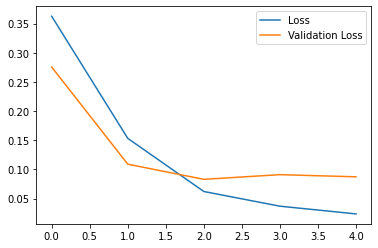

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

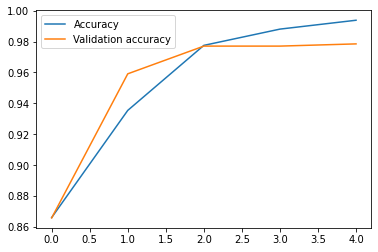

In [12]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()